### Importação de Bibliotecas

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

### Carregamento e Pré-Processamento dos Dados

In [5]:
# Carregar o dataset
data = pd.read_csv('parkinsons.csv')

# Separar variáveis independentes e dependentes
X = data.drop(['target'], axis=1)
y = data['target']

### Exercício 5

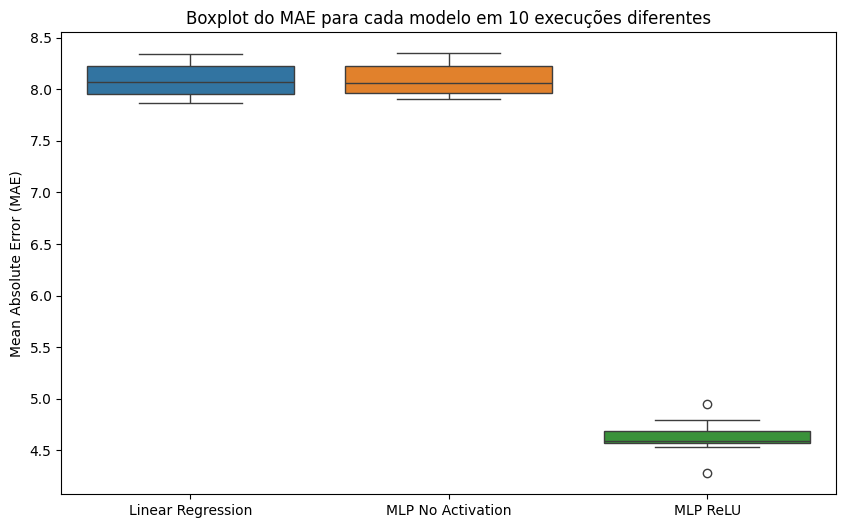

In [15]:
# Listas para armazenar os MAEs de cada modelo
mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

# Treinar e avaliar os modelos em 10 execuções diferentes
for i in range(1, 11):
    # Divisão 80-20 dos dados com random_state = i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Regressão Linear
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred_linear))
    
    # MLP Regressor sem funções de ativação (identity)
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0, max_iter=1000)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_mlp_no_activation = mlp_no_activation.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_mlp_no_activation))
    
    # MLP Regressor com ReLU
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter=1000)
    mlp_relu.fit(X_train, y_train)
    y_pred_mlp_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_mlp_relu))

# Preparar os dados para o boxplot
results = pd.DataFrame({
    'Linear Regression': mae_linear,
    'MLP No Activation': mae_mlp_no_activation,
    'MLP ReLU': mae_mlp_relu
})

# Representar graficamente o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title('Boxplot do MAE para cada modelo em 10 execuções diferentes')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()


### Exercício 6

### Exercício 7

Vai exercutar Grid Search
Terminou Grid Search


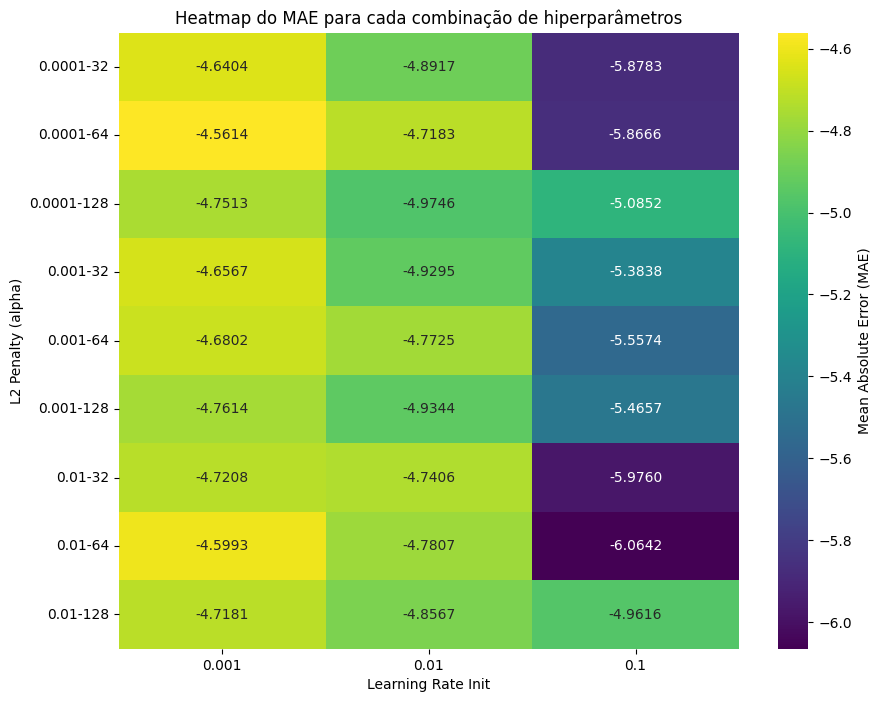

Melhor combinação de hiperparâmetros: {'alpha': 0.0001, 'batch_size': 64, 'learning_rate_init': 0.001}
Melhor MAE no conjunto de validação: 4.5614
MAE no conjunto de teste com o melhor modelo: 4.2835


In [6]:
# Dividir o dataset em treino e teste (80-20) com random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir o modelo base de MLP Regressor com 2 camadas ocultas de 10 neurônios cada
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0, max_iter=1000)

# Definir a grade de parâmetros para a busca
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],                # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],       # Learning rate
    'batch_size': [32, 64, 128]                     # Batch size
}

# Definir o scorer como MAE (menor MAE é melhor)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Configurar o Grid Search com validação cruzada (cv=3)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scorer, cv=3, n_jobs=-1)

print("Vai exercutar Grid Search")

# Executar o Grid Search
grid_search.fit(X_train, y_train)

print("Terminou Grid Search")

# Obter os resultados em um DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Extrair as combinações de hiperparâmetros e seus respectivos MAEs
results['param_combination'] = results['param_alpha'].astype(str) + ', ' + \
                               results['param_learning_rate_init'].astype(str) + ', ' + \
                               results['param_batch_size'].astype(str)

# Representar um heatmap dos resultados
pivot_table = results.pivot_table(index=['param_alpha', 'param_batch_size'], columns='param_learning_rate_init', values='mean_test_score', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.4f', cbar_kws={'label': 'Mean Absolute Error (MAE)'})
plt.title('Heatmap do MAE para cada combinação de hiperparâmetros')
plt.xlabel('Learning Rate Init')
plt.ylabel('L2 Penalty (alpha)')
plt.show()

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negativo porque o MAE foi usado como scorer negativo
print(f"Melhor combinação de hiperparâmetros: {best_params}")
print(f"Melhor MAE no conjunto de validação: {best_score:.4f}")

# Testar o melhor modelo no conjunto de teste
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE no conjunto de teste com o melhor modelo: {test_mae:.4f}")


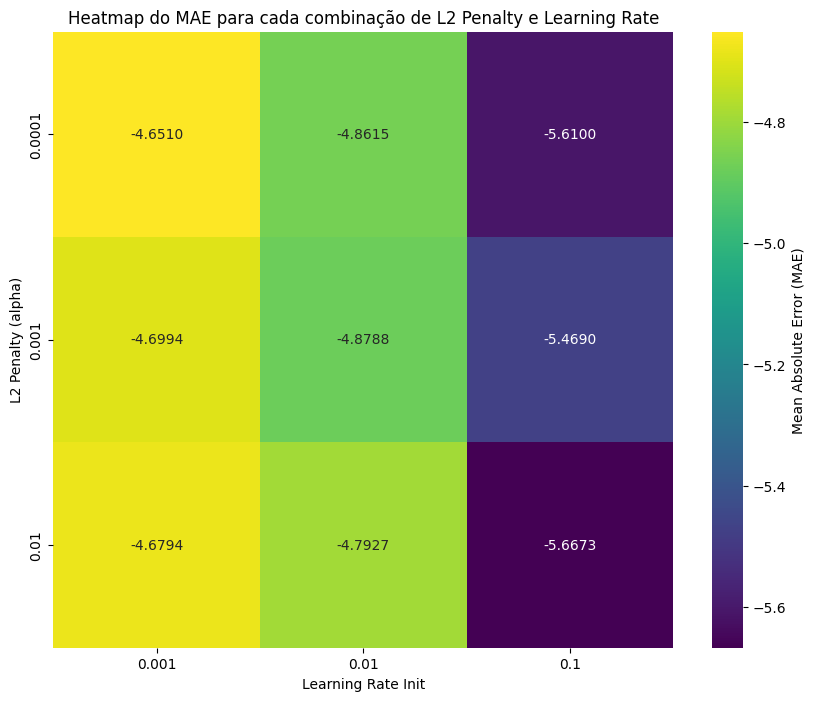

Melhor combinação de hiperparâmetros: {'alpha': 0.0001, 'batch_size': 64, 'learning_rate_init': 0.001}
Melhor MAE no conjunto de validação: 4.5614
MAE no conjunto de teste com o melhor modelo: 4.2835


In [8]:
# Importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

# Dividir o dataset em treino e teste (80-20) com random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir o modelo base de MLP Regressor com 2 camadas ocultas de 10 neurônios cada
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0, max_iter=1000)

# Definir a grade de parâmetros para a busca
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],                # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],       # Learning rate
    'batch_size': [32, 64, 128]                     # Batch size
}

# Definir o scorer como MAE (menor MAE é melhor)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Configurar o Grid Search com validação cruzada (cv=3)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scorer, cv=3, n_jobs=-1)

# Executar o Grid Search
grid_search.fit(X_train, y_train)

# Obter os resultados em um DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Agrupar pela combinação de alpha e learning_rate_init, e calcular a média do MAE
results_grouped = results.groupby(['param_alpha', 'param_learning_rate_init']).mean_test_score.mean().reset_index()

# Fazer o pivot usando os resultados agrupados
pivot_table = results_grouped.pivot(index='param_alpha', columns='param_learning_rate_init', values='mean_test_score')

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.4f', cbar_kws={'label': 'Mean Absolute Error (MAE)'})
plt.title('Heatmap do MAE para cada combinação de L2 Penalty e Learning Rate')
plt.xlabel('Learning Rate Init')
plt.ylabel('L2 Penalty (alpha)')
plt.show()

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negativo porque o MAE foi usado como scorer negativo
print(f"Melhor combinação de hiperparâmetros: {best_params}")
print(f"Melhor MAE no conjunto de validação: {best_score:.4f}")

# Testar o melhor modelo no conjunto de teste
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE no conjunto de teste com o melhor modelo: {test_mae:.4f}")


Vai executar Grid Search
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Terminou Grid Search
   param_alpha  param_learning_rate_init  param_batch_size       MAE
0       0.0001                     0.001                32  4.746074
1       0.0001                     0.010                32  4.637974
2       0.0001                     0.100                32  5.413745
3       0.0001                     0.001                64  4.667538
4       0.0001                     0.010                64  4.865169


/var/folders/7_/wmkwd_w90j99p4h0d6jvcvj00000gn/T/ipykernel_14722/4071181760.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=results, x='param_learning_rate_init', y='MAE', hue='param_alpha', ci=None)


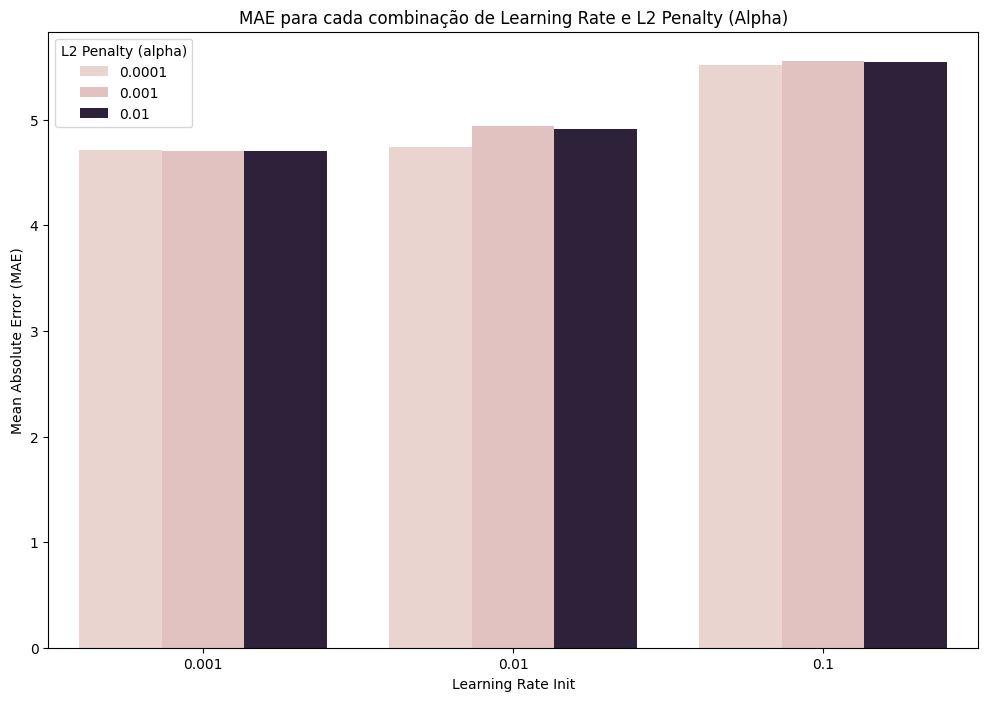

Melhor combinação de hiperparâmetros: {'alpha': 0.0001, 'batch_size': 32, 'learning_rate_init': 0.01}
Melhor MAE no conjunto de validação: 4.6380
MAE no conjunto de teste com o melhor modelo: 4.4865


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Carregar o dataset (substitua com o caminho correto do arquivo)
data = pd.read_csv('parkinsons.csv')

# Separar variáveis independentes e dependentes
X = data.drop(['target'], axis=1)
y = data['target']

# Dividir o dataset em treino e teste (80-20) com random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o modelo base de MLP Regressor com 2 camadas ocultas de 10 neurônios cada
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0, max_iter=1000)

# Definir a grade de parâmetros para a busca
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],                # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],       # Learning rate
    'batch_size': [32, 64, 128]                     # Batch size
}

# Definir o scorer como MAE (menor MAE é melhor)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Configurar o Grid Search com validação cruzada (cv=3)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scorer, cv=3, n_jobs=-1, verbose=1)

print("Vai executar Grid Search")

# Executar o Grid Search
grid_search.fit(X_train, y_train)

print("Terminou Grid Search")

# Obter os resultados em um DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Adicionar coluna de MAE positivo
results['MAE'] = -results['mean_test_score']  # Convertendo para MAE positivo

# Verificar as primeiras linhas dos resultados
print(results[['param_alpha', 'param_learning_rate_init', 'param_batch_size', 'MAE']].head())

# Gráfico de Barras Agrupadas: Comparar o MAE para cada combinação de hiperparâmetros
plt.figure(figsize=(12, 8))
sns.barplot(data=results, x='param_learning_rate_init', y='MAE', hue='param_alpha', ci=None)
plt.title('MAE para cada combinação de Learning Rate e L2 Penalty (Alpha)')
plt.xlabel('Learning Rate Init')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend(title='L2 Penalty (alpha)')
plt.show()

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negativo porque o MAE foi usado como scorer negativo
print(f"Melhor combinação de hiperparâmetros: {best_params}")
print(f"Melhor MAE no conjunto de validação: {best_score:.4f}")

# Testar o melhor modelo no conjunto de teste
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE no conjunto de teste com o melhor modelo: {test_mae:.4f}")


Vai executar Grid Search
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Terminou Grid Search
   param_alpha  param_learning_rate_init  param_batch_size       MAE
0       0.0001                     0.001                32  4.746074
1       0.0001                     0.010                32  4.637974
2       0.0001                     0.100                32  5.413745
3       0.0001                     0.001                64  4.667538
4       0.0001                     0.010                64  4.865169


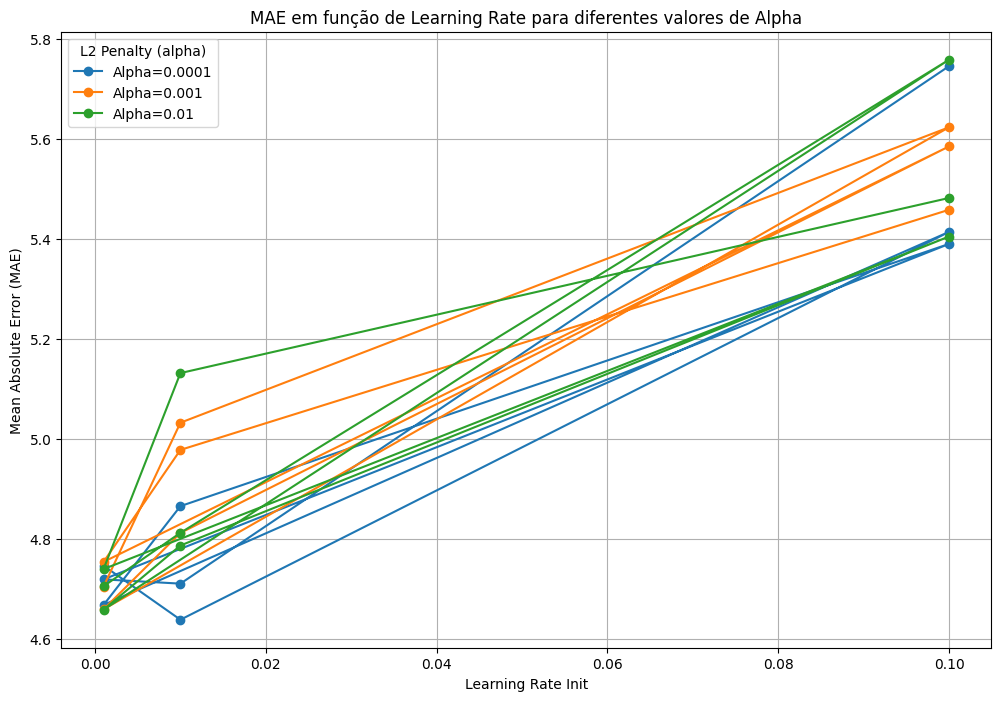

Melhor combinação de hiperparâmetros: {'alpha': 0.0001, 'batch_size': 32, 'learning_rate_init': 0.01}
Melhor MAE no conjunto de validação: 4.6380
MAE no conjunto de teste com o melhor modelo: 4.4865


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Carregar o dataset (substitua com o caminho correto do arquivo)
data = pd.read_csv('parkinsons.csv')  # Substitua com o caminho correto do dataset

# Separar variáveis independentes e dependentes
X = data.drop(['target'], axis=1)  # Substitua 'target_column' pela coluna alvo correta
y = data['target']  # Substitua 'target_column' pela coluna alvo correta

# Dividir o dataset em treino e teste (80-20) com random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o modelo base de MLP Regressor com 2 camadas ocultas de 10 neurônios cada
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0, max_iter=1000)

# Definir a grade de parâmetros para a busca
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],                # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],       # Learning rate
    'batch_size': [32, 64, 128]                     # Batch size
}

# Definir o scorer como MAE (menor MAE é melhor)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Configurar o Grid Search com validação cruzada (cv=3)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scorer, cv=3, n_jobs=-1, verbose=1)

print("Vai executar Grid Search")

# Executar o Grid Search
grid_search.fit(X_train, y_train)

print("Terminou Grid Search")

# Obter os resultados em um DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Adicionar coluna de MAE positivo
results['MAE'] = -results['mean_test_score']  # Convertendo para MAE positivo

# Verificar as primeiras linhas dos resultados
print(results[['param_alpha', 'param_learning_rate_init', 'param_batch_size', 'MAE']].head())

# Gráfico de Linhas: Comparar o MAE em função de learning_rate_init para diferentes valores de alpha
plt.figure(figsize=(12, 8))

# Agrupar os dados e criar uma linha separada para cada valor de alpha
for alpha in results['param_alpha'].unique():
    subset = results[results['param_alpha'] == alpha]
    plt.plot(subset['param_learning_rate_init'], subset['MAE'], marker='o', label=f'Alpha={alpha}')

# Configurações adicionais do gráfico
plt.title('MAE em função de Learning Rate para diferentes valores de Alpha')
plt.xlabel('Learning Rate Init')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend(title='L2 Penalty (alpha)')
plt.grid(True)
plt.show()

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negativo porque o MAE foi usado como scorer negativo
print(f"Melhor combinação de hiperparâmetros: {best_params}")
print(f"Melhor MAE no conjunto de validação: {best_score:.4f}")

# Testar o melhor modelo no conjunto de teste
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE no conjunto de teste com o melhor modelo: {test_mae:.4f}")


Vai exercutar Grid Search
Terminou Grid Search


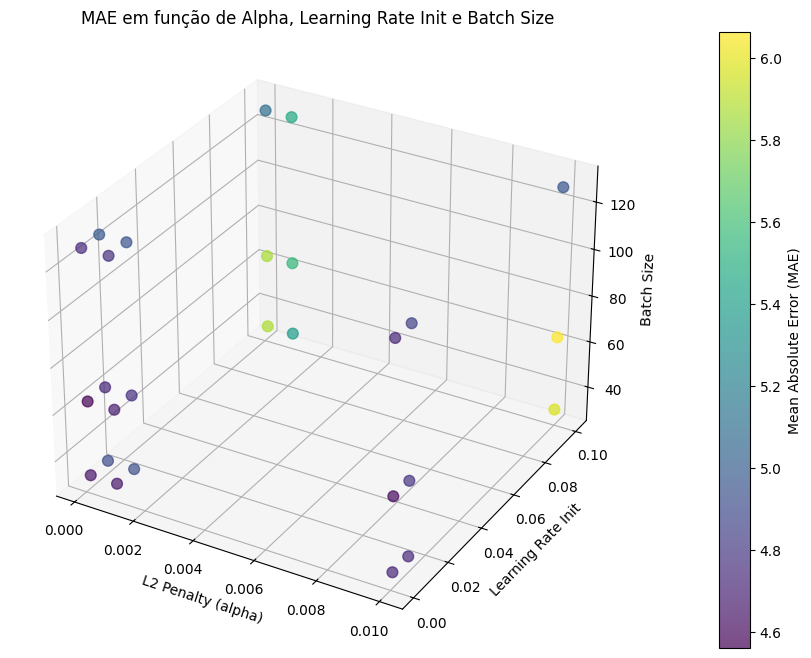

Melhor combinação de hiperparâmetros: {'alpha': 0.0001, 'batch_size': 64, 'learning_rate_init': 0.001}
Melhor MAE no conjunto de validação: 4.5614
MAE no conjunto de teste com o melhor modelo: 4.2835


In [13]:
# Dividir o dataset em treino e teste (80-20) com random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir o modelo base de MLP Regressor com 2 camadas ocultas de 10 neurônios cada
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0, max_iter=1000)

# Definir a grade de parâmetros para a busca
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],                # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],       # Learning rate
    'batch_size': [32, 64, 128]                     # Batch size
}

# Definir o scorer como MAE (menor MAE é melhor)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Configurar o Grid Search com validação cruzada (cv=3)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scorer, cv=3, n_jobs=-1)

print("Vai exercutar Grid Search")

# Executar o Grid Search
grid_search.fit(X_train, y_train)

print("Terminou Grid Search")

# Obter os resultados em um DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Adicionar coluna de MAE positivo
results['MAE'] = -results['mean_test_score']  # Convertendo para MAE positivo

# Gráfico de Dispersão 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    results['param_alpha'],
    results['param_learning_rate_init'],
    results['param_batch_size'],
    c=results['MAE'],
    cmap='viridis',
    s=60,
    alpha=0.7
)

# Adicionar rótulos
ax.set_xlabel('L2 Penalty (alpha)')
ax.set_ylabel('Learning Rate Init')
ax.set_zlabel('Batch Size')
ax.set_title('MAE em função de Alpha, Learning Rate Init e Batch Size')

# Adicionar barra de cores
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Mean Absolute Error (MAE)')

plt.show()

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # MAE positivo
print(f"Melhor combinação de hiperparâmetros: {best_params}")
print(f"Melhor MAE no conjunto de validação: {best_score:.4f}")

# Testar o melhor modelo no conjunto de teste
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE no conjunto de teste com o melhor modelo: {test_mae:.4f}")
